# SMS Spam Classification 

In [23]:
##The SMS Spam Collection is a set of SMS messages that have been collected and labeled as either spam or not spam.
##This dataset contains 5574 English, real, and non-encoded messages. 

#### Loading Dataset

In [24]:
import os
print(os.listdir(r"C:\Desktop\Assignment"))
import numpy as np
import pandas as pd

# Load the dataset
data_path = r"C:\Desktop\Assignment\Train.csv"
df = pd.read_csv(data_path)



['BackendAPI.py', 'FrontEnd.html', 'sms.ipynb', 'Train.csv']


#### To Identify is it balanced dataset?

In [25]:
target_counts = df['label'].value_counts()  # Get counts of each value
print(target_counts)

label
0    4827
1     747
Name: count, dtype: int64


#### (Number of samples,feataures)


In [26]:
print(df.shape)

(5574, 2)


#### Count of null values in each column


In [27]:
df.isnull().sum()

sms      0
label    0
dtype: int64

#### Num of duplicate rows


In [28]:
df.duplicated().sum()

403

#### Information About columns 


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None


#### Label Encoding 

In [30]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List files in the specified directory
print(os.listdir(r"C:\Desktop\Assignment"))

# Load the dataset
data_path = r"C:\Desktop\Assignment\Train.csv"
df = pd.read_csv(data_path)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Example usage of LabelEncoder (assuming 'label' is a column in your DataFrame)
df['encoded_label'] = label_encoder.fit_transform(df['label'])

# Continue with your analysis
print(df.head())  # Example of further data processing



['BackendAPI.py', 'FrontEnd.html', 'sms.ipynb', 'Train.csv']
                                                 sms  label  encoded_label
0  Go until jurong point, crazy.. Available only ...      0              0
1                    Ok lar... Joking wif u oni...\n      0              0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1              1
3  U dun say so early hor... U c already then say...      0              0
4  Nah I don't think he goes to usf, he lives aro...      0              0


#### Removing Duplicates


In [31]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

print("\nDataFrame after removing duplicates:")
print(df_no_duplicates)


DataFrame after removing duplicates:
                                                    sms  label  encoded_label
0     Go until jurong point, crazy.. Available only ...      0              0
1                       Ok lar... Joking wif u oni...\n      0              0
2     Free entry in 2 a wkly comp to win FA Cup fina...      1              1
3     U dun say so early hor... U c already then say...      0              0
4     Nah I don't think he goes to usf, he lives aro...      0              0
...                                                 ...    ...            ...
5569  This is the 2nd time we have tried 2 contact u...      1              1
5570             Will ü b going to esplanade fr home?\n      0              0
5571  Pity, * was in mood for that. So...any other s...      0              0
5572  The guy did some bitching but I acted like i'd...      0              0
5573                       Rofl. Its true to its name\n      0              0

[5171 rows x 3 columns]


In [32]:
df.sample(10)

,sms,label,encoded_label
2948,Leave it. U will always be ignorant.\n,0,0
4326,Am only searching for good dual sim mobile pa.\n,0,0
4330,1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cance...,0,0
164,-PLS STOP bootydelious (32/F) is inviting you ...,1,1
1391,"I wonder how you got online, my love ? Had you...",0,0
4466,"""CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I ...",0,0
1735,"I think we're going to finn's now, come\n",0,0
2035,Is avatar supposed to have subtoitles\n,0,0
1497,I'm always on yahoo messenger now. Just send t...,0,0
4100,If u dun drive then how i go 2 sch.\n,0,0


## UNIVARIATE ANALYSIS

#### Histogram(Continuous data)

In [33]:
import seaborn as sn
sn.histplot(data=df, x='sms_encoded')


ModuleNotFoundError: No module named 'seaborn'

##### VALUES indicate that in this dataset majority of the messages are not spam 


#### Count Plot(Catagorical Data)

<Axes: xlabel='label', ylabel='count'>

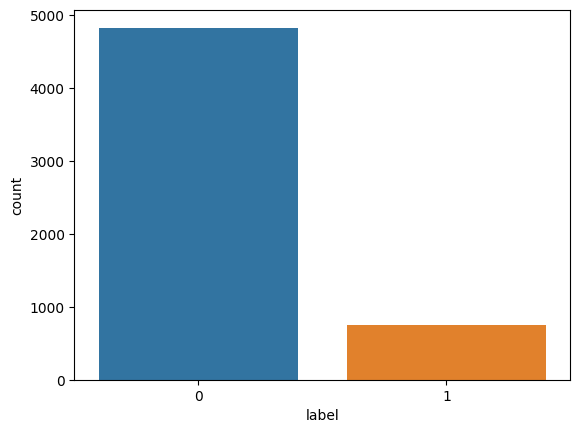

In [ ]:
sn.countplot(x='label', data=df)


#### PIE CHART

<Axes: ylabel='count'>

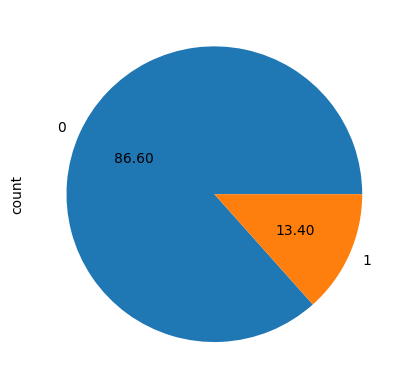

In [ ]:
df['label'].value_counts().plot(kind = 'pie', autopct = '%.2f')

##### The above chart shows that about 13% of the sms,according to provided dataset,are spam.


### BIVARIATE ANALYSIS

#### LINE PLOT(CONTINUOUS DATA)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='label', ylabel='sms_encoded'>

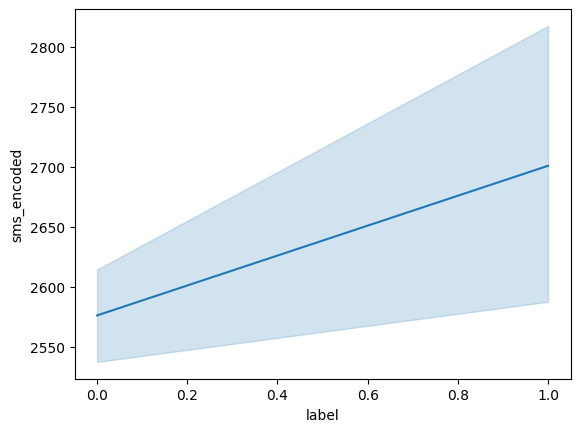

In [ ]:
sn.lineplot(x='label', y='sms_encoded', data=df)



#### Heat Map 

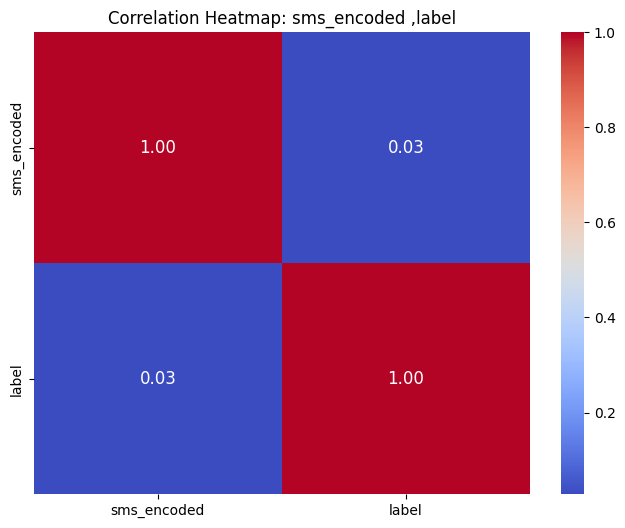

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df[['sms_encoded', 'label']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap: sms_encoded ,label')
plt.show()

##### Each cell in the heatmap contains a numerical value representing the correlation coefficient between two attributes. These values range from -1 to 1.
##### The colors in the heatmap represent the correlation coefficients between pairs of attributes. Positive correlations(increase in value of one attribute causes increase in the value of others')are depicted in warmer colors (e.g., red), while negative correlations(increase in value of one attribute causes decrease in the value of others')are depicted in cooler colors (e.g., blue).

### PERFROMANCE OF MODEL 

DecisionTreeClassifier Accuracy: 0.8986547085201794
Classification Report (DecisionTreeClassifier):
          precision    recall  f1-score
0          0.946865  0.933962  0.940369
1          0.637931  0.689441  0.662687
accuracy   0.898655  0.898655  0.898655


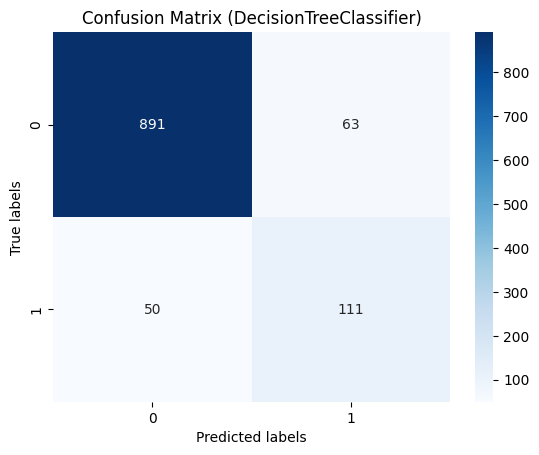

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

# Assume df is your DataFrame containing the data
# Select features and target variable
X = df[['sms_encoded']]  # Assuming you only want to use the encoded SMS column
y = df['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate performance for DecisionTreeClassifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("DecisionTreeClassifier Accuracy:", accuracy_dt)

# Generate classification report
report = classification_report(y_test, y_pred_dt, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Remove the support column and unwanted rows
df_report = df_report.drop(columns=['support'])
df_report = df_report.drop(index=['macro avg', 'weighted avg'])

print("Classification Report (DecisionTreeClassifier):")
print(df_report)

# Generate confusion matrix and plot for DecisionTreeClassifier
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (DecisionTreeClassifier)')
plt.show()





In [ ]:
import pickle 
pickle.dump(df,open('model.pkl','wb'))